<a href="https://colab.research.google.com/github/vkvinay0627/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Cardiovascular Risk Prediction </u></b>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

Data Description
Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

Predict variable (desired target)
• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV



# **Importing and Understanding of Data**



In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('data_cardiovascular_risk.csv')
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# Missing Value Count Function
def show_missing(DataFrame):
    missing = DataFrame.columns[DataFrame.isnull().any()].tolist()
#     return missing

    # Missing data counts and percentage
    print('Missing Data Count')
    print(DataFrame[missing].isnull().sum().sort_values(ascending = False))
    print('--'*50)
    print('Missing Data Percentage')
    print(round(DataFrame[missing].isnull().sum().sort_values(ascending = False)/len(DataFrame)*100,2))
#-----------------------------------------------------------------------------------------------------------------------------#
def impute_nan_mean(df,variable):
    df[variable].fillna(df[variable].mean(),inplace = True)
    
def impute_nan_median(df,variable):
    df[variable].fillna(df[variable].median(),inplace = True)
    
def drop_column(df,variable):
    df.drop([variable],axis=1,inplace = True)
#-----------------------------------------------------------------------------------------------------------------------------#
def Categorical_columns(df):
    Categorical_columns = df.iloc[:,:]
    discrete_cat = []
    for var in Categorical_columns:
        if len(df[var].unique())<20:
            print(var, ' values: ', df[var].unique())
            discrete_cat.append(var)
        
    print('There are {} Categorical columns'.format(len(discrete_cat)))
      
def Numerical_columns(df):
    Numerical_columns = df.iloc[:,:]
    discrete_num = []
    for var in Numerical_columns:
        if len(df[var].unique())>10:
            print(var)
            discrete_num.append(var)
    print('There are {} Numerical columns'.format(len(discrete_num)))
#-----------------------------------------------------------------------------------------------------------------------------#

In [ ]:
show_missing(df)

Missing Data Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


In [ ]:
var_mean = ['heartRate','BMI', 'glucose', 'cigsPerDay' ]
for var in var_mean:
        impute_nan_mean(df,var)
        
var_median  = ['BPMeds']
for var in var_median:
        impute_nan_median(df,var)


var_drop = ['id','education']
for var in var_drop:
        drop_column(df,var)

df.dropna(axis=0,inplace=True)

In [ ]:
df.isna().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
Numerical_columns(df)

age
cigsPerDay
totChol
sysBP
diaBP
BMI
heartRate
glucose
There are 8 Numerical columns


In [ ]:
Categorical_columns(df)

sex  values:  ['F' 'M']
is_smoking  values:  ['YES' 'NO']
BPMeds  values:  [0. 1.]
prevalentStroke  values:  [0 1]
prevalentHyp  values:  [0 1]
diabetes  values:  [0 1]
TenYearCHD  values:  [1 0]
There are 7 Categorical columns


# **Exploratory Data Analyis**

In [ ]:
def Categorical_columns_list(df):
    Categorical_columns = df.iloc[:,:]
    discrete_cat = []
    for var in Categorical_columns:
        if len(df[var].unique())<20:
            discrete_cat.append(var)
    return discrete_cat

def Numerical_columns_list(df):
    Numerical_columns = df.iloc[:,:]
    discrete_num = []
    for var in Numerical_columns:
        if len(df[var].unique())>10:
            discrete_num.append(var)
    return discrete_num
#-----------------------------------------------------------------------------------------------------------------------
def univariate_categorical_EDA(df,discrete_cat):
    for col in discrete_cat:
        counts = df[col].value_counts().sort_index()
        import matplotlib.pyplot as plt 
        fig = plt.figure(figsize=(6, 5))
        ax = fig.gca()
        counts.plot.bar(ax = ax, color='steelblue')
        ax.set_title(col + ' counts')
        ax.set_xlabel(col) 
        ax.set_ylabel("Frequency")
    plt.show()
    
def univariate_numerical_EDA(df,discrete_num):
    for col in discrete_num:
        import matplotlib.pyplot as plt 
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        feature = df[col]
        feature.hist(bins=50, ax = ax)
        ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
        ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
        ax.set_title(col)
    plt.show()
#-----------------------------------------------------------------------------------------------------------------------    
def heat_map(df):
    corr = df.corr()
    import matplotlib.pyplot as plt 
    plt.figure(figsize=(15,10))
    import seaborn as sns 
    sns.heatmap(corr, annot=True, annot_kws={'size':15},cmap='coolwarm')

## Uni-variate Analysis

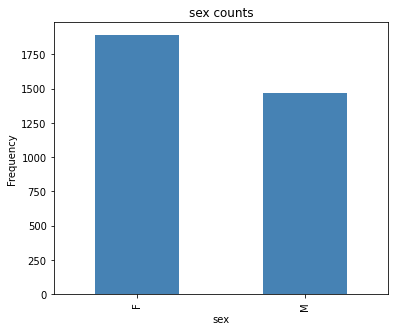

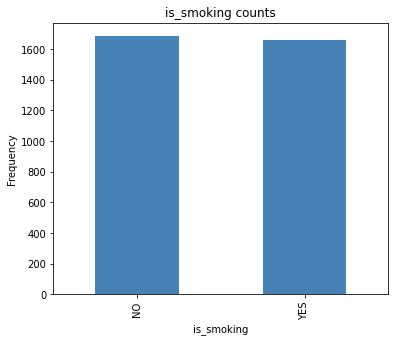

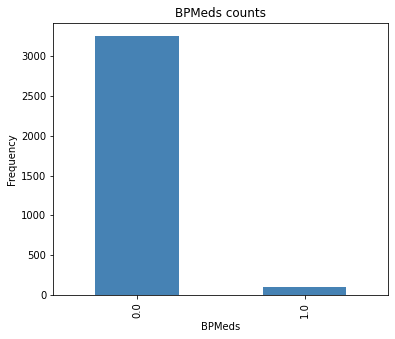

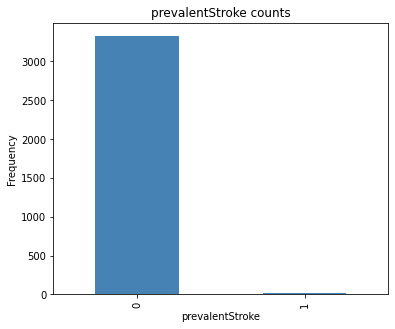

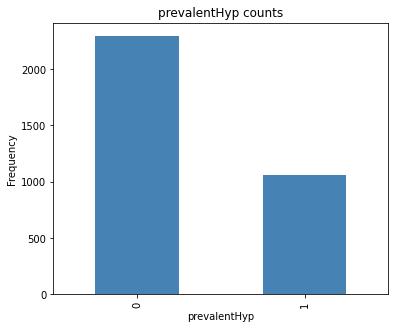

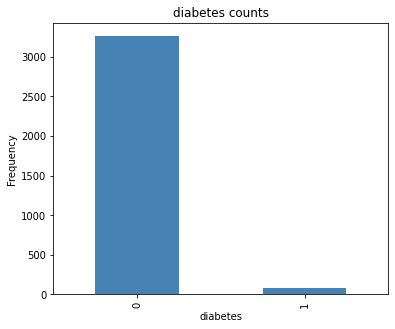

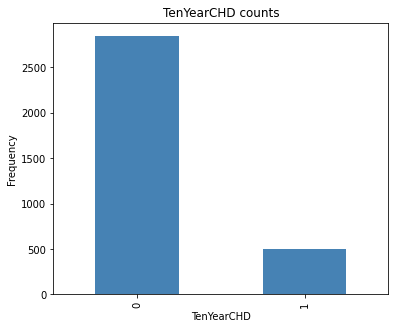

In [ ]:
list_cat = Categorical_columns_list(df)
univariate_categorical_EDA(df,list_cat)

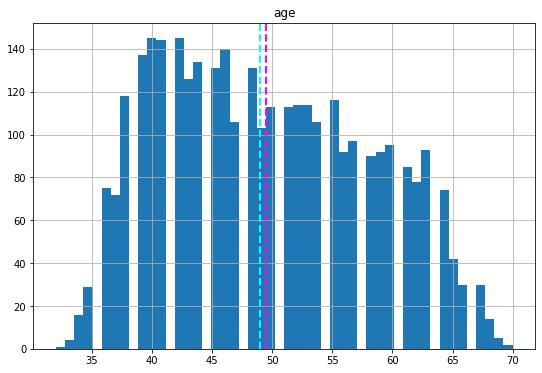

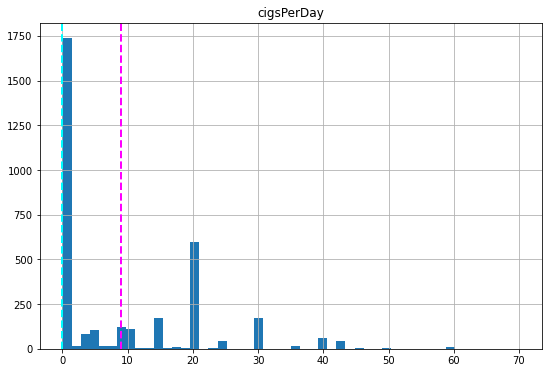

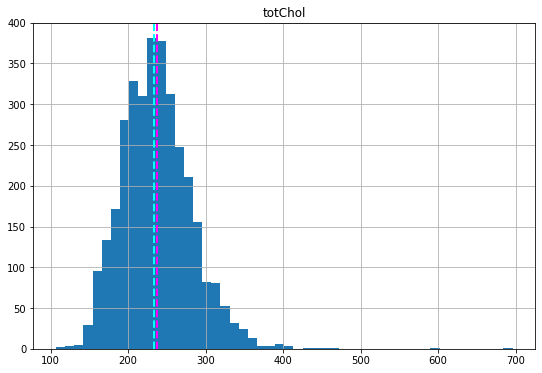

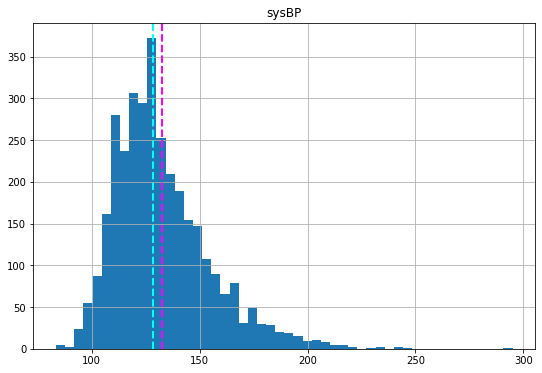

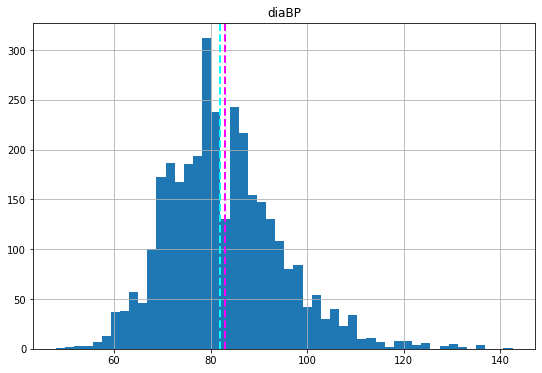

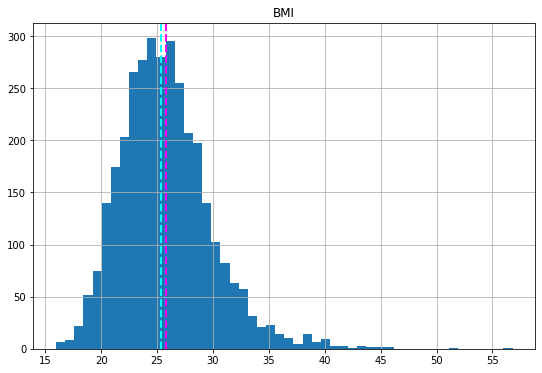

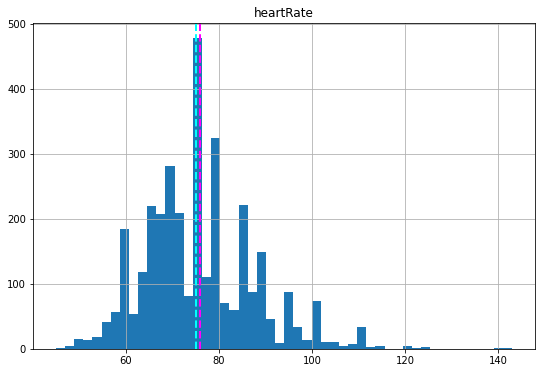

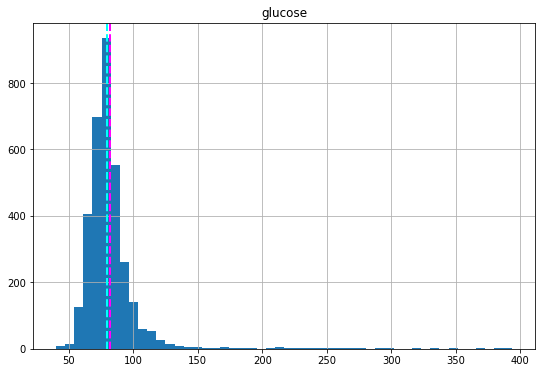

In [ ]:
list_num = Numerical_columns_list(df)
univariate_numerical_EDA(df,list_num)

## Bi-variate Analysis

# **Feature Engineering**

In [ ]:
df = pd.get_dummies(df , columns = ['sex', 'is_smoking'] , prefix = ["sex" , "smoke"] , drop_first=True)

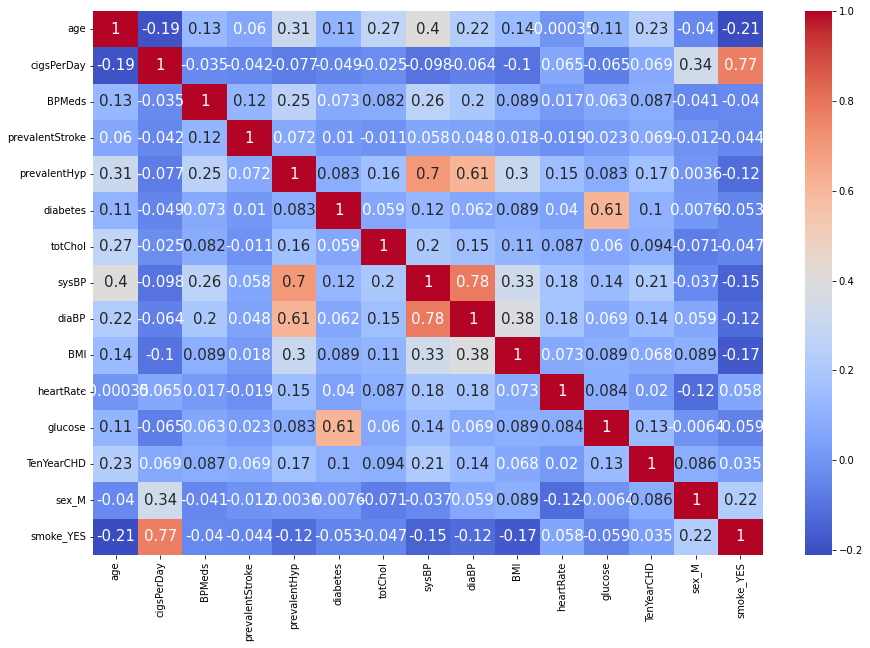

In [ ]:
heat_map(df)

In [ ]:
df['Bp'] = df['sysBP'] + df['diaBP']
df = df.drop(['smoke_YES','sysBP','diaBP','diabetes'] , 1)
df.head()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,totChol,BMI,heartRate,glucose,TenYearCHD,sex_M,Bp
0,64,3.0,0.0,0,0,221.0,25.794964,90.0,80.0,1,0,233.0
1,36,0.0,0.0,0,1,212.0,29.770000,72.0,75.0,0,1,266.0
2,46,10.0,0.0,0,0,250.0,20.350000,88.0,94.0,0,0,187.0
3,50,20.0,0.0,0,1,233.0,28.260000,68.0,94.0,1,1,246.0
4,64,30.0,0.0,0,0,241.0,26.420000,70.0,77.0,0,0,221.5


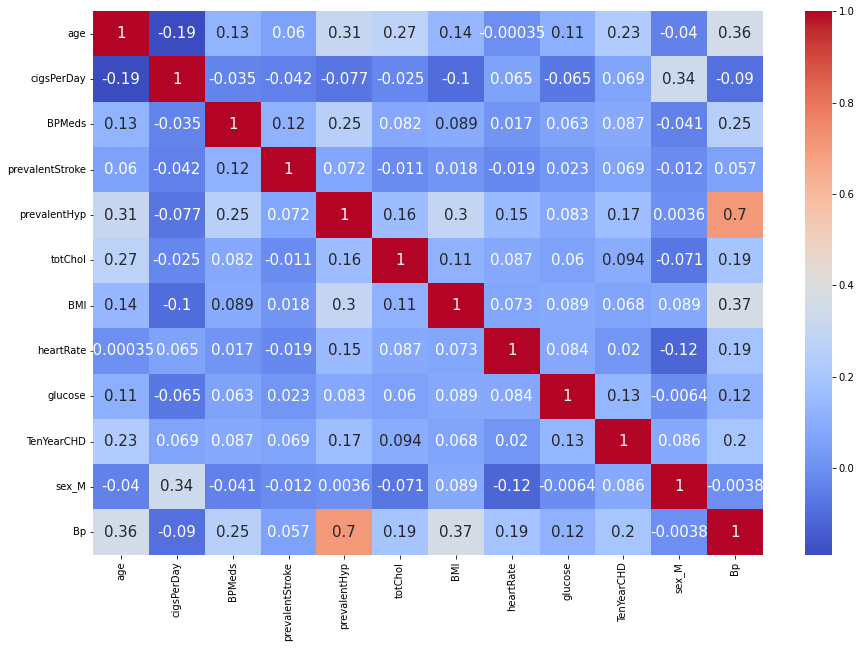

In [ ]:
heat_map(df)

In [ ]:
df = df.drop(['prevalentHyp'] , 1)

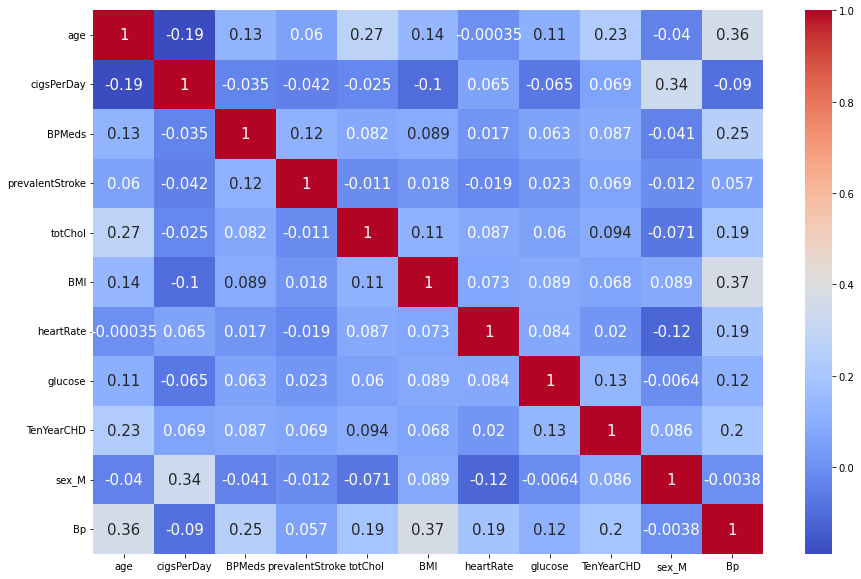

In [ ]:
heat_map(df)

504
2848


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

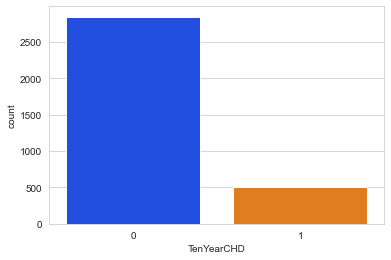

In [ ]:
# Class count
class_count_0, class_count_1 = df['TenYearCHD'].value_counts()
print(class_count_1)
print(class_count_0)
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD' , data = df , palette='bright')


In [ ]:
X = df.drop(['TenYearCHD'], axis = 1)
y = df['TenYearCHD']

# **Model Selection**

## Libraries

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

import seaborn as sns 
import matplotlib.pyplot as plt

import numpy as np                               # vectors and matrices
import pandas as pd  

#-----------------------------------------------------------------------------------------------------------------------#
def model_selection(X_train,y_train,X_test,y_test,models):
    accuracies = {}
    recall = {}

    for model in models:
        model_name = str(model).split('.')[-1][:-2]
        print("Model :",model_name)
        model =model().fit(X_train,y_train)
        y_pred = model.predict(X_test)
        acc = model.score(X_test,y_test)*100
        accuracies[model_name] = acc
        print(confusion_matrix(y_test, y_pred))
        print("Accuracy  : ",accuracy_score(y_test, y_pred))
        print("Precision : ",precision_score(y_test, y_pred))
        print("Recall    : ",recall_score(y_test, y_pred))
        print("F1        : ",f1_score(y_test, y_pred))
        rec = (recall_score(y_test, y_pred))
        recall[model_name] = rec*100
        print('-'*50)
#-----------------------------------------------------------------------------------------------------------------------#        
def recall_dict(X_train,y_train,X_test,y_test,models):
    recall = []
    modelnames = []
    for model in models:
        model_name = str(model).split('.')[-1][:-2]
        modelnames.append(model_name)
        model =model().fit(X_train,y_train)
        y_pred = model.predict(X_test)
        rec = (recall_score(y_test, y_pred))
        recall.append(rec)

    recall_list = []
    recall_list.insert(0,modelnames)
    recall_list.insert(1,recall)
#     print(f"before {recall_list}")
    recall_dict = {}
    i = 0
    counter = len(models)
    while i < counter:
        recall_dict[recall_list[0][i]] = recall_list[1][i]
        i+=1
#     print(f"after {recall_dict}")
    
    return recall_dict

def accuracy_dict(X_train,y_train,X_test,y_test,models):
    accuracy = []
    modelnames = []
    for model in models:
        model_name = str(model).split('.')[-1][:-2]
        modelnames.append(model_name)
        model =model().fit(X_train,y_train)
        y_pred = model.predict(X_test)
        acc = model.score(X_test,y_test)
        accuracy.append(acc)

    accuracy_list = []
    accuracy_list.insert(0,modelnames)
    accuracy_list.insert(1,accuracy)
#     print(f"before {accuracy_list}")
    accuracy_dict = {}
    i = 0
    counter = len(models)
    while i < counter:
        accuracy_dict[accuracy_list[0][i]] = accuracy_list[1][i]
        i+=1
#     print(f"after {accuracy_dict}")
    
    return accuracy_dict
#-----------------------------------------------------------------------------------------------------------------------#        
def recall_plots(recall):
    colors = ["purple", "green", "orange", "magenta"]
    
    sns.set_style("whitegrid")
    plt.figure(figsize=(16,5))
    plt.yticks(np.arange(0,100,5))
    plt.ylabel("Recall %")
    plt.xlabel("Algorithms")
    sns.barplot(x=list(recall.keys()), y=list(recall.values()), palette=colors)
    plt.show()
    
def accuracy_plots(accuracies):
    colors = ["purple", "green", "orange", "magenta"]

    sns.set_style("whitegrid")
    plt.figure(figsize=(16,5))
    plt.yticks(np.arange(0,100,5))
    plt.ylabel("Accuracy %")
    plt.xlabel("Algorithms")
    sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
    plt.show()
#-----------------------------------------------------------------------------------------------------------------------#  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.3, random_state = 11) 
print(X_train.shape)
print(X_test.shape)

(2346, 10)
(1006, 10)


In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [ ]:
models = [LogisticRegression, GaussianNB, KNeighborsClassifier, DecisionTreeClassifier ]
model_selection(X_train,y_train,X_test,y_test,models)

Model : LogisticRegression
[[857   7]
 [124  18]]
Accuracy  :  0.8697813121272365
Precision :  0.72
Recall    :  0.1267605633802817
F1        :  0.2155688622754491
--------------------------------------------------
Model : GaussianNB
[[830  34]
 [115  27]]
Accuracy  :  0.8518886679920478
Precision :  0.4426229508196721
Recall    :  0.19014084507042253
F1        :  0.2660098522167488
--------------------------------------------------
Model : KNeighborsClassifier
[[829  35]
 [120  22]]
Accuracy  :  0.8459244532803181
Precision :  0.38596491228070173
Recall    :  0.15492957746478872
F1        :  0.2211055276381909
--------------------------------------------------
Model : DecisionTreeClassifier
[[739 125]
 [106  36]]
Accuracy  :  0.7703777335984096
Precision :  0.2236024844720497
Recall    :  0.2535211267605634
F1        :  0.23762376237623764
--------------------------------------------------


In [ ]:
recall = recall_dict(X_train,y_train,X_test,y_test,models)
accuracy = accuracy_dict(X_train,y_train,X_test,y_test,models)

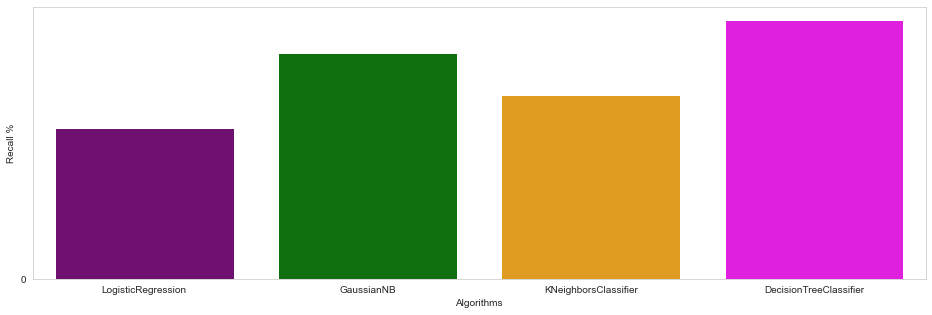

In [ ]:
recall_plots(recall)

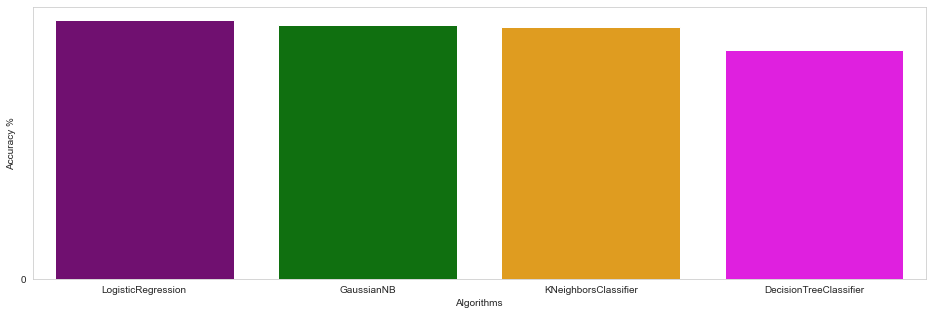

In [ ]:
accuracy_plots(accuracy)

## With SMOTE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [ ]:
smote=SMOTE(random_state=5)
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_smote)))

The number of classes before fit Counter({0: 2143, 1: 371})
The number of classes after fit Counter({1: 2143, 0: 2143})


In [ ]:
models = [LogisticRegression, GaussianNB, KNeighborsClassifier, DecisionTreeClassifier ]
model_selection(X_train_smote,y_train_smote,X_test,y_test,models)

Model : LogisticRegression
[[468 237]
 [ 37  96]]
Accuracy  :  0.6730310262529833
Precision :  0.2882882882882883
Recall    :  0.7218045112781954
F1        :  0.41201716738197425
--------------------------------------------------
Model : GaussianNB
[[664  41]
 [ 95  38]]
Accuracy  :  0.837708830548926
Precision :  0.4810126582278481
Recall    :  0.2857142857142857
F1        :  0.3584905660377359
--------------------------------------------------
Model : KNeighborsClassifier
[[471 234]
 [ 60  73]]
Accuracy  :  0.649164677804296
Precision :  0.23778501628664495
Recall    :  0.5488721804511278
F1        :  0.33181818181818185
--------------------------------------------------
Model : DecisionTreeClassifier
[[559 146]
 [ 86  47]]
Accuracy  :  0.7231503579952268
Precision :  0.24352331606217617
Recall    :  0.3533834586466165
F1        :  0.28834355828220853
--------------------------------------------------


In [ ]:
recall_smote = recall_dict(X_train_smote,y_train_smote,X_test,y_test,models)
accuracy_smote = accuracy_dict(X_train_smote,y_train_smote,X_test,y_test,models)

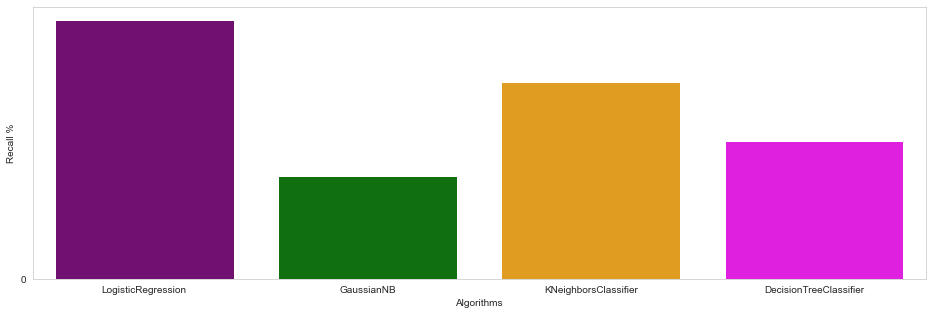

In [ ]:
recall_plots(recall_smote)

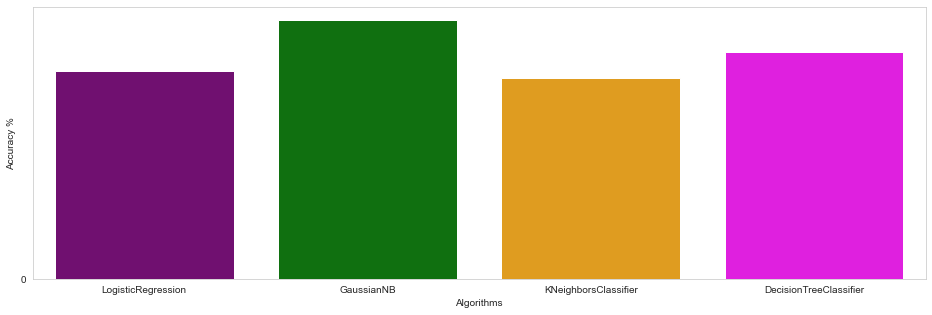

In [ ]:
accuracy_plots(accuracy_smote)

In [ ]:
print("Model : Logistic Regression(Test) ")
penalty = ['l2']
C = [0.01, 0.1, 1, 2, 10, 100]
hyperparameters = dict(C=C, penalty=penalty)
logistic = LogisticRegression()
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
log=GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
log.fit(X_train_smote,y_train_smote)
print(log.best_estimator_)
y_pred = log.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print("Accuracy  : ",accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test, y_pred))
print("Recall    : ",recall_score(y_test, y_pred))
print("F1        : ",f1_score(y_test, y_pred))

Model : Logistic Regression(Test) 
LogisticRegression(C=0.1)
[[466 239]
 [ 37  96]]
Accuracy  :  0.6706443914081146
Precision :  0.2865671641791045
Recall    :  0.7218045112781954
F1        :  0.41025641025641024


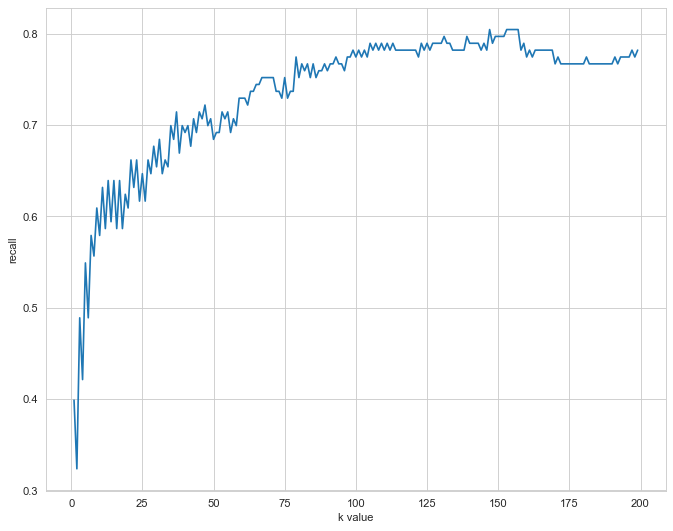

In [ ]:
k_range=range(1,200)
scores=[]
Recall = {}
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_smote,y_train_smote)
    y_pred=knn.predict(X_test)
    scores.append(recall_score(y_test, y_pred))
    Recall[k] = recall_score(y_test, y_pred)

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)
plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('recall')

plt.show()

In [ ]:
print("Recall is Max at K :" , max(Recall, key=Recall.get))
k_optimum =  max(Recall, key=Recall.get)
print("Model : KNeighborsClassifier(Test) ")
knn = KNeighborsClassifier(n_neighbors=k_optimum).fit(X_train_smote,y_train_smote)
y_pred = knn.predict(X_test)
acc = knn.score(X_test,y_test)*100
print(confusion_matrix(y_test, y_pred))
print("Accuracy  : ",accuracy_score(y_test, y_pred))
print("Precision : ",precision_score(y_test, y_pred))
print("Recall    : ",recall_score(y_test, y_pred))
print("F1        : ",f1_score(y_test, y_pred))
print('-'*50)

Recall is Max at K : 147
Model : KNeighborsClassifier(Test) 
[[426 279]
 [ 26 107]]
Accuracy  :  0.636038186157518
Precision :  0.2772020725388601
Recall    :  0.8045112781954887
F1        :  0.4123314065510597
--------------------------------------------------
